In [1]:
import uproot
import matplotlib.pyplot as plt
import numpy as np

In [2]:
tree = uproot.open('../dat/kernel_10pvs.root')['kernel']

We can look inside and see what keys are available

In [3]:
tree.keys()

[b'pv_n', b'sv_n', b'pv_cat', b'pv_loc', b'sv_cat', b'sv_loc', b'zdata']

Many of these are "jagged" arrays, which means they are lists of variable lenth lists.

Categories are defined as:

| value | PVs (primary verticies) | SVs (secondary verticies) |
|-------|:------------------------|---------------------------|
|  -1   | < 2 particles made hits | no particles made hits    |
|   0   | < 5 long tracks         | 1 particle with hits      |
|   1   | LHCb PV                 | 2+ (an actual SV)         |


In [4]:
tree['pv_cat'].array()

<JaggedArray [[1 1 0 1 0 1 0 0] [1 1 1 1 1] [ 1  1  1  0 -1  1  1  0 -1  1  0  1] ... [0 1] [0 1 1 0 1 1] [0 1 1 0]] at 7f8d10474898>

In [5]:
zdata = tree['zdata'].array()
pv_loc = tree['pv_loc'].array()
pv_cat = tree['pv_cat'].array()
sv_loc = tree['sv_loc'].array()
sv_cat = tree['sv_cat'].array()

In [6]:
zvals = np.linspace(-100,300, 4000, endpoint=False) + 400/4000/2

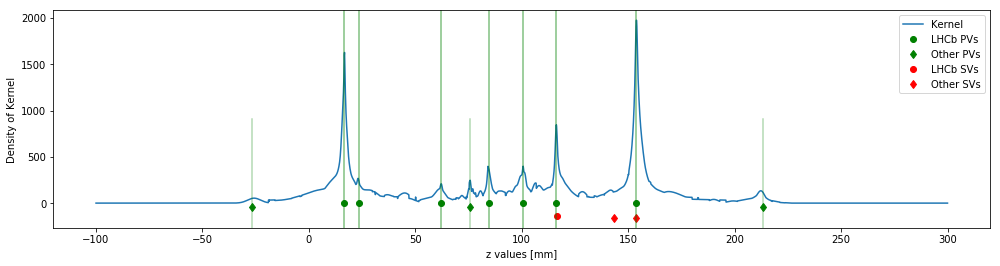

In [7]:
plt.figure(figsize=(14,3.8))
i = 2
plt.plot(zvals, zdata[i], label="Kernel")
pv_1 = pv_loc[i][pv_cat[i]==1]
pv_0 = pv_loc[i][pv_cat[i]==0]
pv_x = pv_loc[i][pv_cat[i]==-1]
sv_1 =  sv_loc[i][sv_cat[i]==1]
sv_0 =  sv_loc[i][sv_cat[i]==0]
sv_x = sv_loc[i][sv_cat[i]==-1]
plt.plot(pv_1, pv_1*0, 'og', label='LHCb PVs')
plt.plot(pv_0, pv_0*0-40, 'dg', label='Other PVs')
#plt.plot(pv_x, pv_x*0-80, 'xg', label='Bad PVs')
plt.plot(sv_1, sv_1*0-140, 'or', label='LHCb SVs')
plt.plot(sv_0, sv_0*0-160, 'dr', label='Other SVs')
#plt.plot(sv_x, sv_x*0-180, 'xr', label='Bad SVs')
for l in pv_1:
    plt.axvline(l, color='g', alpha=.5)
for l in pv_0:
    plt.axvline(l, 0, 0.5, color='g', alpha=.3)
plt.xlabel('z values [mm]')
plt.ylabel('Density of Kernel')
plt.legend()
plt.tight_layout()
plt.savefig('kernel_and_pvs.pdf')
plt.show()